# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Clustering and dimension-reduction
### VIDEO: K-means clustering
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from scipy import stats
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

The shape of the data: (150, 2)


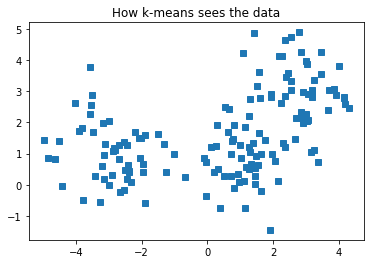

In [14]:
## Create data

nPerClust = 50

# blur around centroid (std units)
blur = 1

# XY centroid locations
A = [1, 1]
B = [-3, 1]
C = [3, 3]

# generate data
a = [A[0] + np.random.randn(nPerClust)*blur, A[1] + np.random.randn(nPerClust)*blur]
b = [B[0] + np.random.randn(nPerClust)*blur, B[1] + np.random.randn(nPerClust)*blur]
c = [C[0] + np.random.randn(nPerClust)*blur, C[1] + np.random.randn(nPerClust)*blur]

# concatanate (horizontally) into a list
data = np.transpose(np.concatenate((a, b, c), axis=1))
print(f"The shape of the data: {data.shape}")

# show the data
plt.plot(data[:, 0], data[:, 1], 's')
plt.title('How k-means sees the data')
plt.show()

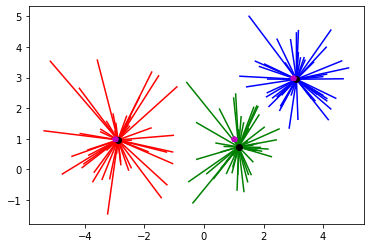

In [3]:
## k-means clustering

k = 3 # how many clusters?
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(data)
# group labels
groupidx = kmeans.predict(data)
# centroids
cents = kmeans.cluster_centers_

# draw lines from each data point to the centroids of each cluster
lineColors = 'rgbgmrkbgm';
for i in range(0, len(data)):
    plt.plot([data[i, 0], cents[groupidx[i], 0]], [data[i, 1], cents[groupidx[i], 1]],
             lineColors[groupidx[i]])

# and now plot the centroid locations
plt.plot(cents[:, 0], cents[:, 1], 'ko')

# finally, the "ground-truth" centers
plt.plot(A[0], A[1], 'mp')
plt.plot(B[0], B[1], 'mp')
plt.plot(C[0], C[1], 'mp')

plt.show()

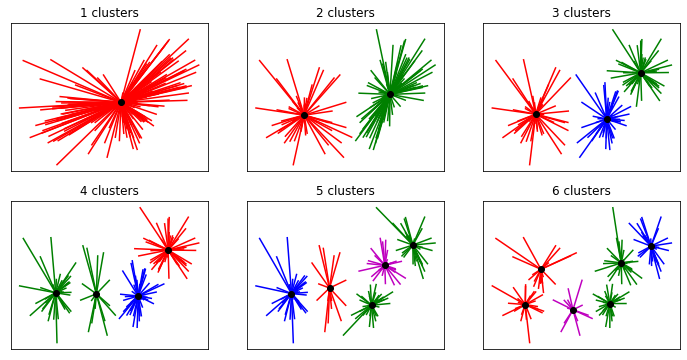

In [4]:
## determining the appropriate number of clusters (qualitative)

fig, ax = plt.subplots(2, 3, figsize=(12, 6))
ax = ax.flatten()

for k in range(6):
    
    kmeans = KMeans(n_clusters=k+1).fit(data)
    groupidx = kmeans.predict(data)
    cents = kmeans.cluster_centers_
    
    # draw lines from each data point to the centroids of each cluster
    for i in range(0, len(data)):
        ax[k].plot([data[i, 0], cents[groupidx[i], 0]], [data[i, 1], cents[groupidx[i], 1]],
                   lineColors[groupidx[i]])
    
    # and now plot the centroid locations
    ax[k].plot(cents[:, 0], cents[:, 1], 'ko')
    ax[k].set_xticks([])
    ax[k].set_yticks([])
    ax[k].set_title('%g clusters'%(k+1))

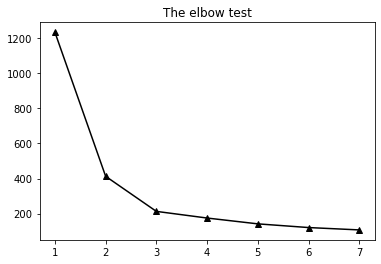

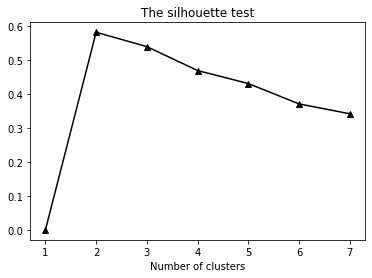

In [16]:
## number of clusters (quantative)

from sklearn.metrics import silhouette_samples, silhouette_score

ssds = np.zeros(7)
sils = np.zeros(7)#/0

for k in range(7):
    kmeans = KMeans(n_clusters=k+1).fit(data)
    ssds[k] = np.mean(kmeans.inertia_)
    if k>0:
        s = silhouette_samples(data, kmeans.predict(data))
        sils[k] = np.mean(s)

plt.plot(np.arange(1, 8), ssds, 'k^-', markerfacecolor='k')
plt.title('The elbow test')
plt.show()

plt.plot(np.arange(1, 8), sils, 'k^-', markerfacecolor='k')
plt.title('The silhouette test')
plt.xlabel('Number of clusters')
plt.show()

'''
Данные методы дают неверные результаты - мы симулировали данные и знаем, что правильное
количество кластеров равно 3.
'''

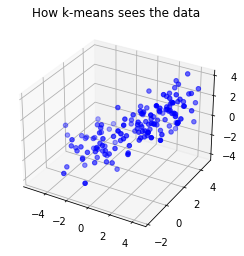

In [20]:
## Try again in 3D

nPerClust = 50

# blur around centroid (std units)
n = 1

# XY centroid locations
A = [ 1, 2, 0]
B = [-2, 1, -2]
C = [3, 3,  2]

# generate data
a = [A[0] + np.random.randn(nPerClust)*n, A[1] + np.random.randn(nPerClust)*n,
     A[2] + np.random.randn(nPerClust)*n]
b = [B[0] + np.random.randn(nPerClust)*n, B[1] + np.random.randn(nPerClust)*n,
     B[2] + np.random.randn(nPerClust)*n]
c = [C[0] + np.random.randn(nPerClust)*n, C[1] + np.random.randn(nPerClust)*n, 
     C[2] + np.random.randn(nPerClust)*n]

# concatanate into a list
data = np.transpose(np.concatenate((a, b, c), axis=1))

# show the data
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c ='b', marker='o')
plt.title('How k-means sees the data')
plt.show()

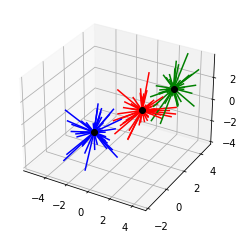

In [21]:
k = 3 # how many clusters?
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(data)
# group labels
groupidx = kmeans.predict(data)
# centroids
cents = kmeans.cluster_centers_

# draw lines from each data point to the centroids of each cluster
lineColors = 'rgbgmrkbgm';
fig = plt.figure()
ax = plt.axes(projection='3d')
for i in range(0,len(data)):
    ax.plot([data[i, 0], cents[groupidx[i], 0]], [data[i, 1], cents[groupidx[i], 1]],
            [data[i, 2], cents[groupidx[i], 2]], lineColors[groupidx[i]])

# and now plot the centroid locations
ax.plot(cents[:, 0], cents[:, 1], cents[:,2], 'ko')
plt.show()